In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from bra_scraper import BRA
plt.style.use('fivethirtyeight')


In [4]:
bra = BRA()
bra.topics

[<Topic: Årsvis - Land och län 1975-2014, land och region 2015- (brottstyp)>,
 <Topic: Årsvis - Kommun och storstädernas stadsdelar 1996- (brottstyp)>,
 <Topic: Årsvis - Land, län, kommun och storstädernas stadsdelar 1975-2014 (brottstyp)>,
 <Topic: Månads- och kvartalsvis - Land och län 1975-2014, land och region 2015- (brottstyp)>,
 <Topic: Månads- och kvartalsvis - Kommun och storstädernas stadsdelar 1996- (brottstyp)>,
 <Topic: Månads- och kvartalsvis - Land, län, kommun och storstädernas stadsdelar 1975-2014 (brottstyp)>,
 <Topic: Årsvis - Land och län 1975-2014, land och region 2015- (brottskod)>,
 <Topic: Årsvis - Kommun och storstädernas stadsdelar 1996- (brottskod)>,
 <Topic: Årsvis - Land, län, kommun och storstädernas stadsdelar 1975-2014 (brottskod)>,
 <Topic: Månads- och kvartalsvis - Land och län 1975-2014, land och region 2015- (brottskod)>]

In [5]:
by_muni = bra.topic(u"Årsvis - Kommun och storstädernas stadsdelar 1996-", level="brottstyp")
by_county = bra.topic(u"Årsvis - Land och län 1975-2014, land och region 2015-", level="brottstyp")

In [55]:
sex_crimes = ["Sexualbrott"]
rape_crimes = []
for crime in by_county.crimes:
    if crime.parent:
        if crime.parent.label == "Sexualbrott":
            sex_crimes.append(crime.label)
        if crime.parent.label == u"Sexualbrott, Våldtäkt inkl. grov (ingår även i våldsbrott)":
            rape_crimes.append(crime.label)



In [64]:
df = by_county.query(crimes=sex_crimes + rape_crimes, regions=["Hela landet"]).dataframe

137 in topic.py at 2017-02-26 20:18:44,910: Making query of 1 regions, 104 crimes and 42 periods in Årsvis - Land och län 1975-2014, land och region 2015-.
140 in topic.py at 2017-02-26 20:18:44,911: Getting expected 4368 datapoints
21 in surfer.py at 2017-02-26 20:18:44,912: Start new session
169 in topic.py at 2017-02-26 20:18:45,151: Parse result page 1 out of 1
185 in topic.py at 2017-02-26 20:18:46,786: Parsed 4368 datapoints


In [65]:
is_level_1 = df.crime=="Sexualbrott"
is_level_2 = df.crime.isin(sex_crimes) 
is_2016 = df.timepoint=="2016-01-01"
is_rape_crime = df.crime.isin(rape_crimes)


In [75]:
# Format label
df.loc[~is_level_1, "crime"] = df[~is_level_1].crime.str.replace("Sexualbrott, ", "").str.replace(u" \(ingår även i våldsbrott\)","")
df.loc[is_rape_crime, "crime"] = df[is_rape_crime].crime.str.replace(u"Våldtäkt inkl. grov, ", "")


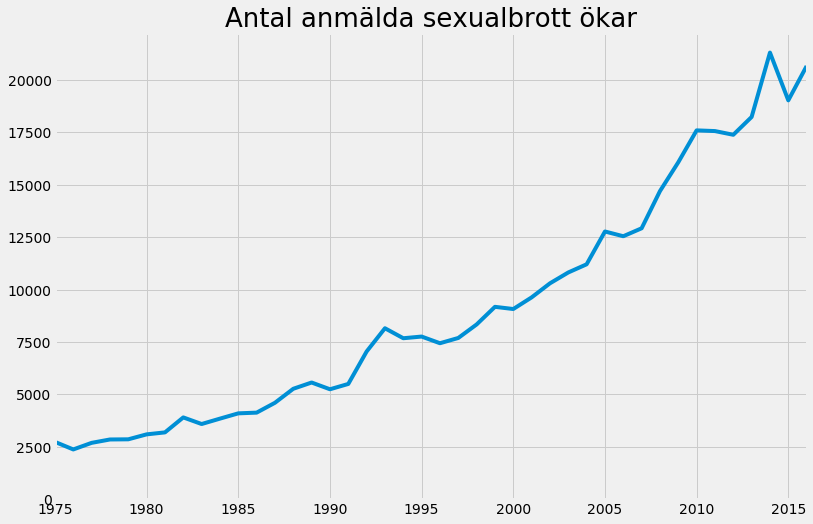

In [89]:
ax = df[is_level_1].set_index("timepoint").value.plot(figsize=(12,8))
ax.set_ylim(0)
ax.set_title(u"Antal anmälda sexualbrott ökar",fontsize= 26)
ax.set_xlabel("")


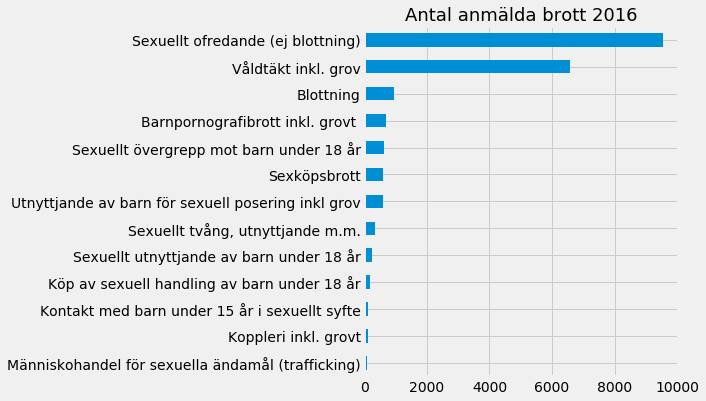

In [97]:
ax = df[is_2016 & is_level_2 & ~is_level_1].set_index("crime").value.sort_values().plot.barh(figsize=(5,6))
ax.set_title(u"Antal anmälda brott 2016",fontsize= 18)
ax.set_ylabel("")

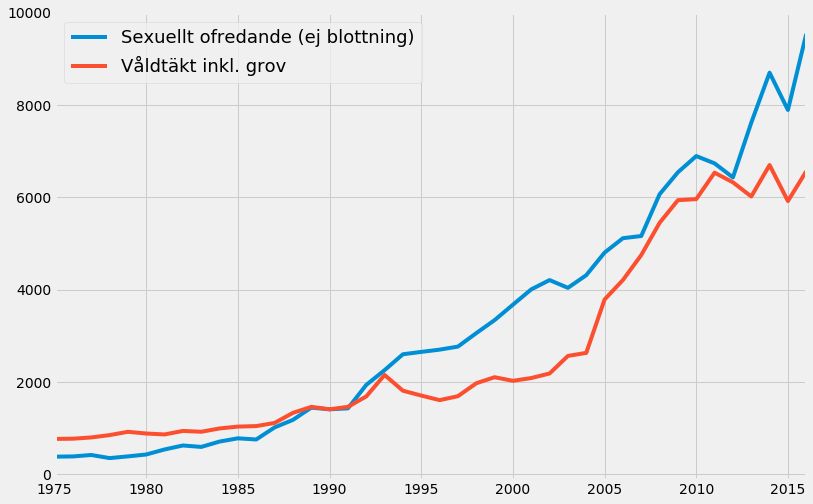

In [92]:
_crime_filter = df.crime.isin(["Sexuellt ofredande (ej blottning)", u'Våldtäkt inkl. grov'])
fig, ax = df[_crime_filter].set_index("timepoint").groupby("crime").value.plot.line(figsize=(12,8))
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best', fontsize=18)     
ax.set_xlabel("")
plt.show()

In [25]:
is_inside_outside = df.crime.isin(["Mot samtliga personer, Inomhus", "Mot samtliga personer, Utomhus"])
df_inside_outside = df[is_inside_outside]
df_inside_outside.crime = df_inside_outside.crime.str.replace("Mot samtliga personer, ","")



/Library/Python/2.7/site-packages/IPython/kernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


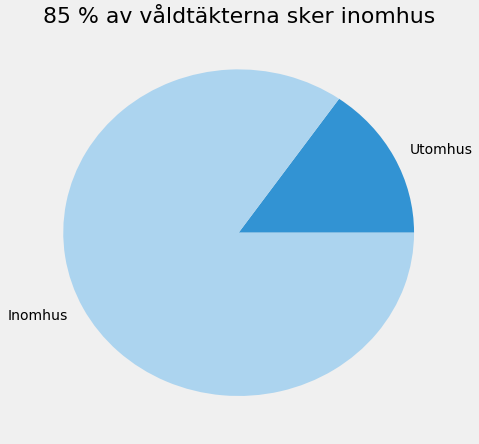

In [95]:
ax = df_inside_outside[is_2016].set_index("crime").value.sort_values().plot.pie(figsize=(7,7), colors=["#3293D3", "#acd4ef"])
ax.set_title(u"85 % av våldtäkterna sker inomhus",fontsize= 22)
ax.set_ylabel("")


In [101]:
df_inside_outside[is_2016].value


/Library/Python/2.7/site-packages/IPython/kernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


3569    5559.0
3611    1004.0
Name: value, dtype: float64

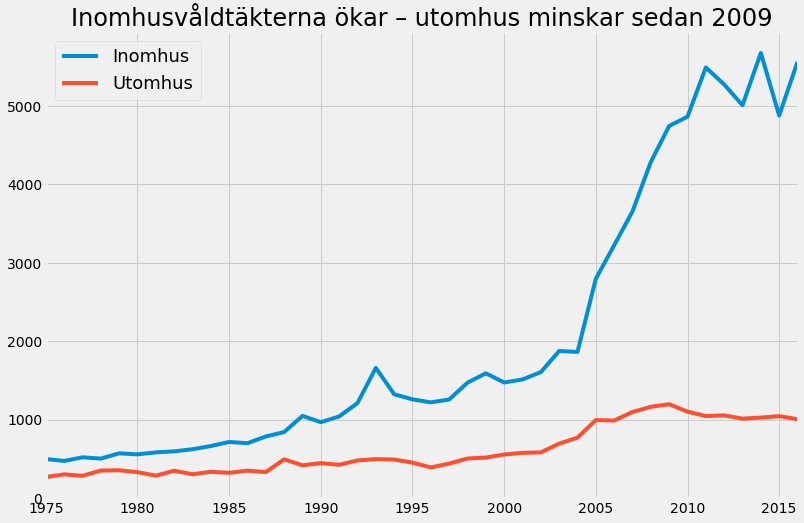

In [100]:
fig, ax = df_inside_outside.set_index("timepoint").groupby("crime").value.plot.line(figsize=(12,8))
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best', fontsize=18)     
fig.set_title(u"Inomhusvåldtäkterna ökar – utomhus minskar sedan 2009",fontsize= 24)
ax.set_xlabel("")
plt.show()

In [85]:
df.crime.unique()

array([u'Sexualbrott', u'V\xe5ldt\xe4kt inkl. grov',
       u'Mot barn under 15 \xe5r', u'Mot barn under 15 \xe5r, Inomhus',
       u'Mot barn under 15 \xe5r, Utomhus',
       u'Mot barn under 15 \xe5r, Fullbordat',
       u'Mot barn under 15 \xe5r, F\xf6rs\xf6k',
       u'Mot barn under 15 \xe5r, Inomhus, fullbordat',
       u'Mot barn under 15 \xe5r, Inomhus, f\xf6rs\xf6k',
       u'Mot barn under 15 \xe5r, Utomhus, fullbordat',
       u'Mot barn under 15 \xe5r, Utomhus, f\xf6rs\xf6k',
       u'Mot flicka under 15 \xe5r', u'Mot flicka under 15 \xe5r, Inomhus',
       u'Mot flicka under 15 \xe5r, Utomhus',
       u'Mot flicka under 15 \xe5r, Fullbordat',
       u'Mot flicka under 15 \xe5r, F\xf6rs\xf6k',
       u'Mot flicka under 15 \xe5r, Inomhus, fullbordat',
       u'Mot flicka under 15 \xe5r, Inomhus, f\xf6rs\xf6k',
       u'Mot flicka under 15 \xe5r, Utomhus, fullbordat',
       u'Mot flicka under 15 \xe5r, Utomhus, f\xf6rs\xf6k',
       u'Mot pojke under 15 \xe5r', u'Mot pojke u